<a href="https://colab.research.google.com/github/payalpatel1906/Salary-Prediction/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [5]:
os.listdir('/content/drive')

['.shortcut-targets-by-id', 'MyDrive', '.Trash-0', '.Encrypted']

In [6]:
os.listdir('/content/drive/MyDrive')

['Salary_Prediction', 'Colab Notebooks']

In [7]:
os.listdir('/content/drive/MyDrive/Salary_Prediction')

['Untitled0.ipynb']

In [8]:
mkdir /content/drive/MyDrive/Salary_Prediction/dataset

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"payalpatel1921","key":"d411624c6d4fb595a14756d281c59b67"}'}

In [10]:
ls

drive/  kaggle.json  sample_data/


In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets list | head

ref                                                                 title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                                 Chocolate Sales                                         468320  2026-01-04 14:23:35.490000          20251        375  1.0              
aliiihussain/amazon-sales-dataset                                   Amazon_Sales_Dataset                                   1297759  2026-02-01 11:37:12.353000           5225         92  1.0              
amar5693/student-performance-dataset                                Student Performance Dataset                             177286  2026-02-12 06:04:44.613000           1235         24

In [13]:
!kaggle datasets download -d harsh45/random-salary-data-of-employes-age-wise -p /content/drive/MyDrive/Salary_Prediction/dataset

Dataset URL: https://www.kaggle.com/datasets/harsh45/random-salary-data-of-employes-age-wise
License(s): unknown
  0% 0.00/378 [00:00<?, ?B/s]
100% 378/378 [00:00<00:00, 31.8kB/s]


In [15]:
ls /content/drive/MyDrive/Salary_Prediction/dataset

random-salary-data-of-employes-age-wise.zip


In [14]:
import zipfile

In [16]:
zip_path = "/content/drive/MyDrive/Salary_Prediction/dataset/random-salary-data-of-employes-age-wise.zip"
extract_path = "/content/drive/MyDrive/Salary_Prediction/dataset"

with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [17]:
ls /content/drive/MyDrive/Salary_Prediction/dataset

random-salary-data-of-employes-age-wise.zip  Salary_Data.csv


In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("/content/drive/MyDrive/Salary_Prediction/dataset/Salary_Data.csv")
print(df.head())
print(df.info())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


In [20]:
print(df.shape)

(30, 2)


In [21]:
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [22]:
print(df.dtypes)

YearsExperience    float64
Salary             float64
dtype: object


In [23]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [24]:
print(df.duplicated().sum())

0


In [25]:
df.columns = df.columns.str.strip()

In [26]:
df.rename(columns={
    'YearsExperience': 'experience',
    'Salary': 'salary'
}, inplace=True)

In [27]:
print(df.describe())

       experience         salary
count   30.000000      30.000000
mean     5.313333   76003.000000
std      2.837888   27414.429785
min      1.100000   37731.000000
25%      3.200000   56720.750000
50%      4.700000   65237.000000
75%      7.700000  100544.750000
max     10.500000  122391.000000


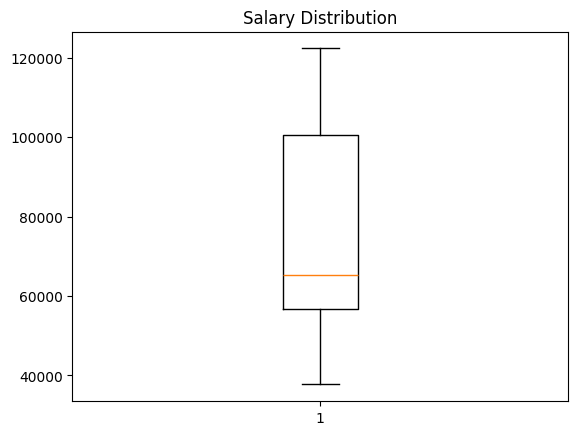

In [29]:
import matplotlib.pyplot as plt

plt.boxplot(df['salary'])
plt.title("Salary Distribution")
plt.show()

In [31]:
# Feature (input)
X = df[['experience']]

# Target (output)
y = df['salary']


In [33]:
print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (30, 1)
Target shape: (30,)


In [34]:
print(X.head())
print(y.head())

   experience
0         1.1
1         1.3
2         1.5
3         2.0
4         2.2
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: salary, dtype: float64
